# DNA Sequence Classification
---

DNA sequence classification AI is based on the dataset from the archive of [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data). It takes an input DNA sequence and outputs the promoter type (+ or -) and the identification class from the inference. The model is using the Random Forest Classification algorithm.

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

## Load dataset

In [2]:
data = pd.read_csv('dataset.csv')
data.describe()

,Promoter,Identification,Sequence
count,106,106,106
unique,2,106,106
top,+,S10,tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgc...
freq,53,1,1


## Encode the 'Promoter' and 'Identification' columns

In [3]:
label_encoder_promoter = LabelEncoder()
label_encoder_identification = LabelEncoder()

data['Promoter'] = label_encoder_promoter.fit_transform(data['Promoter'])
data['Identification'] = label_encoder_identification.fit_transform(data['Identification'])

## Convert sequences into numerical features using CountVectorizer

In [4]:
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 3))  # Use character n-grams
x = vectorizer.fit_transform(data['Sequence'])

## Split the dataset into features and labels for both targets

In [5]:
y_promoter = data['Promoter']
y_identification = data['Identification']

y = pd.DataFrame({'Promoter': y_promoter, 'Identification': y_identification})

## Split the dataset into training and testing sets

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Train the MultiOutputClassifier with Random Forest

In [7]:
classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
classifier.fit(x_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

## Evaluate the model

In [8]:
y_pred = classifier.predict(x_test)
y_pred

array([[ 1, 18],
       [ 0, 89],
       [ 0, 27],
       [ 1,  3],
       [ 0,  5],
       [ 1,  1],
       [ 0, 69],
       [ 0, 43],
       [ 0,  5],
       [ 1, 41],
       [ 0, 33],
       [ 0, 50],
       [ 0,  8],
       [ 1, 33],
       [ 0, 80],
       [ 0, 14],
       [ 1, 33],
       [ 1, 22],
       [ 1, 25],
       [ 0, 33],
       [ 0, 93],
       [ 1, 27]])

## Split predictions for evaluation

In [9]:
y_pred_promoter = y_pred[:, 0]
y_pred_identification = y_pred[:, 1]

## Print classification reports for both targets

In [10]:
print("Promoter Classification Report:")
print(classification_report(y_test['Promoter'], y_pred_promoter, target_names=label_encoder_promoter.classes_))

Promoter Classification Report:
              precision    recall  f1-score   support

           +       0.77      0.91      0.83        11
           -       0.89      0.73      0.80        11

    accuracy                           0.82        22
   macro avg       0.83      0.82      0.82        22
weighted avg       0.83      0.82      0.82        22



## Print accuracy for both targets

In [11]:
accuracy_promoter = accuracy_score(y_test['Promoter'], y_pred_promoter)
accuracy_identification = accuracy_score(y_test['Identification'], y_pred_identification)

print(f"Promoter Accuracy: {accuracy_promoter:.2f}")
print(f"Identification Accuracy: {accuracy_identification:.2f}")

Promoter Accuracy: 0.82
Identification Accuracy: 0.00


## Generate Confusion Matrix for Promoter and Identification Prediction

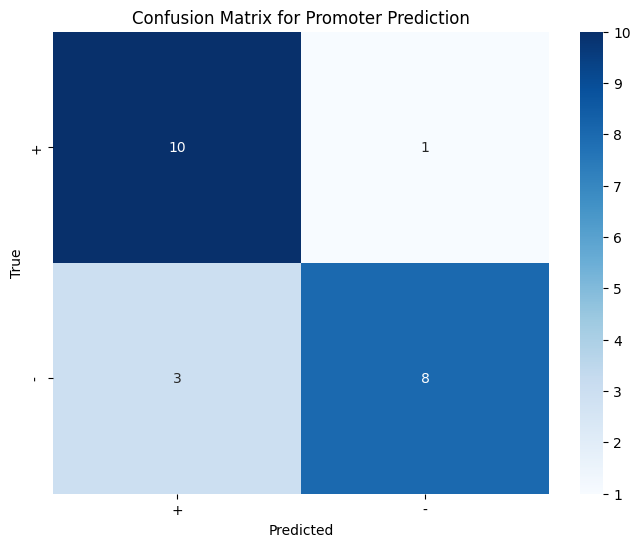

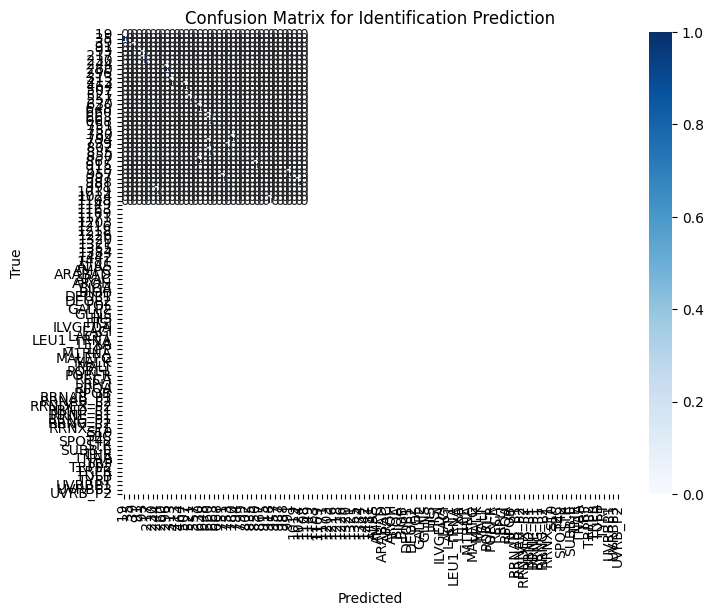

In [12]:
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(y_test['Promoter'], y_pred_promoter, label_encoder_promoter.classes_, "Confusion Matrix for Promoter Prediction")
plot_confusion_matrix(y_test['Identification'], y_pred_identification, label_encoder_identification.classes_, "Confusion Matrix for Identification Prediction")


## Sample inference

In [13]:
sample_sequence = "cagcggcagcacgtttccacgcggtgagcctcaggattcatgtcgatgtcttccg"
sample_vectorized = vectorizer.transform([sample_sequence])
predicted = classifier.predict(sample_vectorized)

predicted_promoter_label = label_encoder_promoter.inverse_transform(predicted[:, 0])
predicted_identification_label = label_encoder_identification.inverse_transform(predicted[:, 1])

print(f"\nSample Sequence: {sample_sequence}")
print(f"Predicted Promoter: {predicted_promoter_label[0]}")
print(f"Predicted Identification: {predicted_identification_label[0]}")


Sample Sequence: cagcggcagcacgtttccacgcggtgagcctcaggattcatgtcgatgtcttccg
Predicted Promoter: -
Predicted Identification:   91


## Save Model to File

In [15]:
model_data = {
    'classifier': classifier,
    'label_encoder_promoter': label_encoder_promoter,
    'label_encoder_identification': label_encoder_identification,
    'vectorizer': vectorizer
}

# Save the model data to a file using pickle
with open('dna_sequence_identification.pickle', 'wb') as f:
    pickle.dump(model_data, f)